# Libraries

In [75]:
from mnist import MNIST
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(0, '../../Libraries')
import JacksonsTSPackage as jts
from statsmodels.tsa.api import VAR

# Loading and Organizing the Data

In [76]:
mndata = MNIST('./Data')
images, labels = mndata.load_training()
labels = labels.tolist()

In [77]:
# Organizing the data
images = [x for _,x in sorted(zip(labels,images))]
labels.sort()
label_counts = list(Counter(labels).values())
num_cycles = min(label_counts)

tensor_shape = (num_cycles*9, 28, 28)
data = np.empty(tensor_shape)

# Makes the cycle
for i in range(num_cycles):
    for j in range(9):
        offset = sum(label_counts[:j]) + i
        tmp = np.asarray(images[offset])
        tmp.resize((tensor_shape[1], tensor_shape[2]))
        data[i*9 + j] = tmp

In [78]:
N = len(data)
N_train = 48780
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 48789
N_train: 48780
N_test: 9


In [79]:
train_tensor = jts.extract_train_tensor(data, N_train)
train_tensor

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

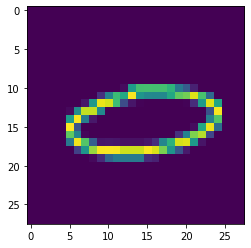

In [80]:
plt.imshow(train_tensor[0])

In [81]:
test_tensor = jts.extract_test_tensor(data, N_train, N_test)
test_tensor

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

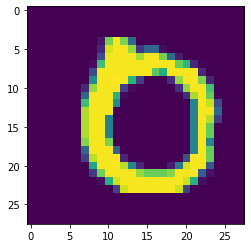

In [82]:
plt.imshow(test_tensor[0])

In [83]:
import pywt
def apply_dwt_to_tensor(tensor, wavelet = 'haar'):

    N = len(tensor)
    matrix_shape = tensor[0].shape
    dwt_tensor = np.zeros((N, matrix_shape[0], matrix_shape[1]))

    for i in range(N):
        for j in range(matrix_shape[0]):
            tmp = pywt.dwt(tensor[i][j], wavelet)
            dwt_tensor[i][j] = np.append(tmp[0], tmp[1])
    return dwt_tensor

train_dwt = apply_dwt_to_tensor(train_tensor)
train_dwt

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

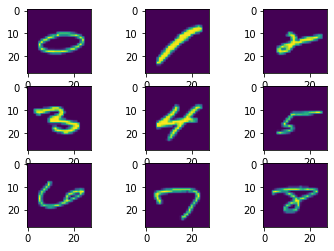

In [84]:
fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(train_tensor[0])
axs[0, 1].imshow(train_tensor[1])
axs[0, 2].imshow(train_tensor[2])
axs[1, 0].imshow(train_tensor[3])
axs[1, 1].imshow(train_tensor[4])
axs[1, 2].imshow(train_tensor[5])
axs[2, 0].imshow(train_tensor[6])
axs[2, 1].imshow(train_tensor[7])
axs[2, 2].imshow(train_tensor[8])

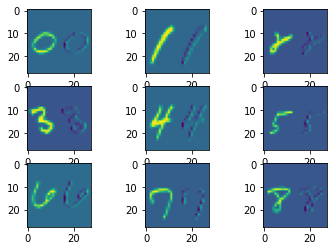

In [85]:
fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(train_dwt[0])
axs[0, 1].imshow(train_dwt[1])
axs[0, 2].imshow(train_dwt[2])
axs[1, 0].imshow(train_dwt[3])
axs[1, 1].imshow(train_dwt[4])
axs[1, 2].imshow(train_dwt[5])
axs[2, 0].imshow(train_dwt[6])
axs[2, 1].imshow(train_dwt[7])
axs[2, 2].imshow(train_dwt[8])

In [86]:
train_model_sets = jts.split_cols_into_model_sets(train_dwt, N_train)
train_model_sets

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [87]:
test_model_sets = jts.split_cols_into_model_sets(test_tensor, N_test)
test_model_sets

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [88]:
result_model_sets = np.empty((tensor_shape[2], N_test, tensor_shape[1]))
result_model_sets.shape

(28, 9, 28)

# Building the Models

In [89]:
for i in range(tensor_shape[2]):
    train_df = pd.DataFrame(train_model_sets[i])
    test_df = pd.DataFrame(test_model_sets[i])
    model = VAR(train_df)
    fit = model.fit(9)
    
    test_df.columns = test_df.columns[:].astype(str)
    results = jts.forecast(fit, train_df, test_df, N_test, calc_conf = False)
    result_model_sets[i] = results
result_model_sets

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.14992961e-02,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.16762364e-02,  0.00000000e

# Inverting the DWT

In [90]:
def collect_result_cols_into_tensor(model_sets, N_test):
    shape = model_sets.shape
    tensor = np.empty((N_test, shape[2], shape[0]))
    for i in range(N_test):
        for j in range(shape[0]):
            tensor[i][:,j] = model_sets[j][i]
    return tensor
result_dwt_tensor = collect_result_cols_into_tensor(result_model_sets, N_test)
result_dwt_tensor

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.68420125e-02, -1.97184933e-03,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.14992961e-02, -3.70680667e-01, ...,
          1.73692717e-01,  5.18103202e-02,  1.65807248e-03],
        [ 0.00000000e+00,  0.00000000e+00, -2.95270260e-01, ...,
         -4.33780037e-02, -1.05987435e-03,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  7.12166200e-03, ...,
         -1.25234582e-02,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

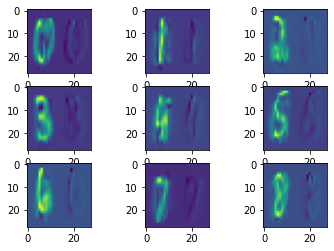

In [91]:
fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(result_dwt_tensor[0])
axs[0, 1].imshow(result_dwt_tensor[1])
axs[0, 2].imshow(result_dwt_tensor[2])
axs[1, 0].imshow(result_dwt_tensor[3])
axs[1, 1].imshow(result_dwt_tensor[4])
axs[1, 2].imshow(result_dwt_tensor[5])
axs[2, 0].imshow(result_dwt_tensor[6])
axs[2, 1].imshow(result_dwt_tensor[7])
axs[2, 2].imshow(result_dwt_tensor[8])

In [92]:
def apply_inverse_dwt_to_tensor(transformed_tensor, wavelet = 'haar'):

    N = len(transformed_tensor)
    matrix_shape = transformed_tensor[0].shape
    tensor = np.empty((N, matrix_shape[0], matrix_shape[1]))
    half_len = int(matrix_shape[0] / 2)

    for i in range(N):
        for j in range(matrix_shape[0]):
            tmp = (transformed_tensor[i][j][:half_len], transformed_tensor[i][j][half_len:])
            tensor[i][j] = pywt.idwt(tmp[0], tmp[1], wavelet)
    return tensor

result_tensor = apply_inverse_dwt_to_tensor(result_dwt_tensor)
result_tensor

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -7.40753415e-03,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  2.56181112e-04, ...,
         -2.62680452e-02,  2.34826933e-03,  3.40074891e-06],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.60194940e-03,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

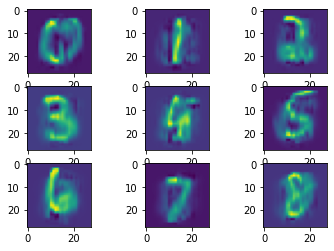

In [93]:
fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(result_tensor[0])
axs[0, 1].imshow(result_tensor[1])
axs[0, 2].imshow(result_tensor[2])
axs[1, 0].imshow(result_tensor[3])
axs[1, 1].imshow(result_tensor[4])
axs[1, 2].imshow(result_tensor[5])
axs[2, 0].imshow(result_tensor[6])
axs[2, 1].imshow(result_tensor[7])
axs[2, 2].imshow(result_tensor[8])